## **Mount drive**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## **Import packages**

In [37]:
#Data analysis libraries
import pandas as pd
import numpy as np

#Data visualizations libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot


!pip install lifelines
from lifelines import KaplanMeierFitter
!pip install pygal
import pygal
from math import pi

#Data preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Importing classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier

# Model selection and cross-validation tools
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, GridSearchCV

# Evaluation metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings("ignore")


In [ ]:
data= pd.read_csv("/content/drive/MyDrive/My python codes/ML projects/Copy of Customer-Churn.csv")

In [ ]:
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [23]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [24]:
data.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [ ]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
data.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


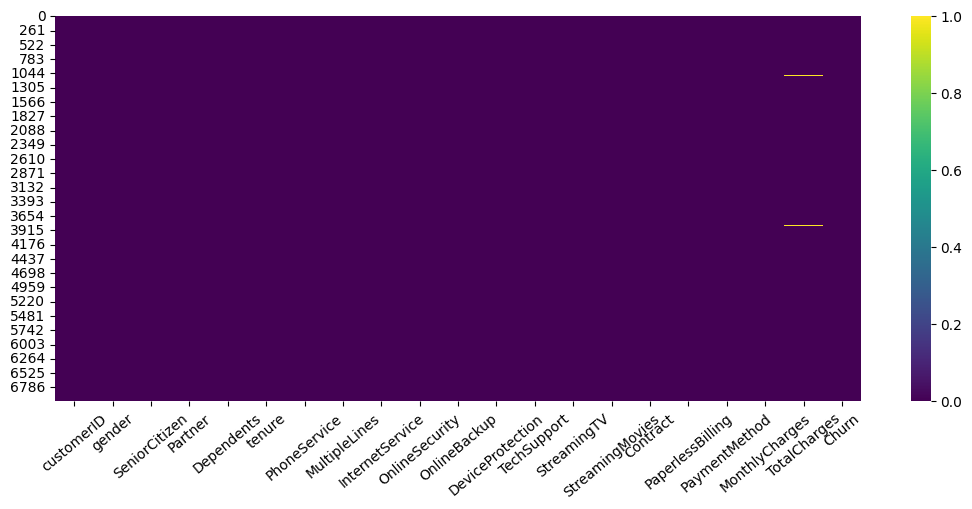

In [ ]:
plt.figure(figsize  =(13,5))
sns.heatmap(data = data.isnull(), cmap = "viridis", vmin = 0, vmax =1)
plt.xticks(rotation = 40)
plt.show();

In [ ]:
# Fill missing values in Totalcharge with corresponding values from Monthly charge
data['TotalCharges'] = data['TotalCharges'].fillna(data['MonthlyCharges'])

In [17]:
# drop irrelevant columns

data = data.drop(["customerID"], axis =1)

In [ ]:
data.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


## **Numerical data**

In [25]:
numerical_df = data.select_dtypes(exclude = "object")
numerical_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,churn_num
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1


## Univariate analysis

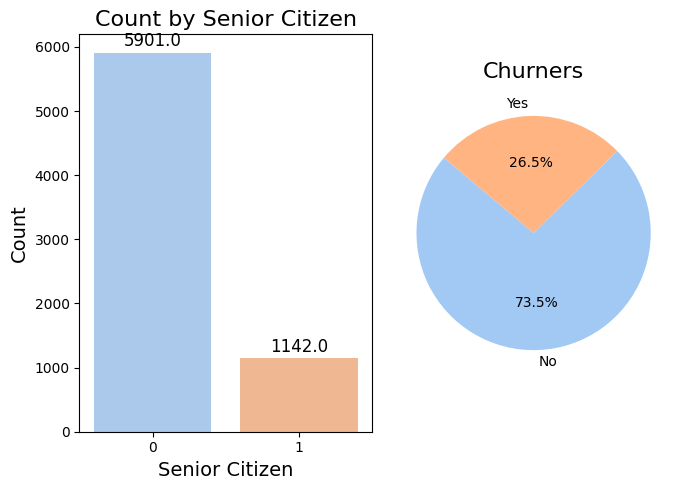

In [ ]:
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize = (7,5))

# Subplot 1: Count plot
sns.countplot(x="SeniorCitizen", data=data,
              order=data["SeniorCitizen"].value_counts(ascending=False).index,
              palette="pastel", ax=axes[0])

# Add labels to the bars
#ax.bar_label(container=ax.containers[0], labels=values)

# Add labels to the bars manually in the count plot
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Set axis labels for the count plot
axes[0].set_xlabel("Senior Citizen", fontsize=14)
axes[0].set_ylabel("Count", fontsize=14)
axes[0].set_title("Count by Senior Citizen", fontsize=16)

# Subplot 2: Pie chart
labels = data["Churn"].value_counts().index
sizes = data["Churn"].value_counts().values
colors = sns.color_palette("pastel")[0:len(labels)]

axes[1].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
axes[1].set_title("Churners", fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

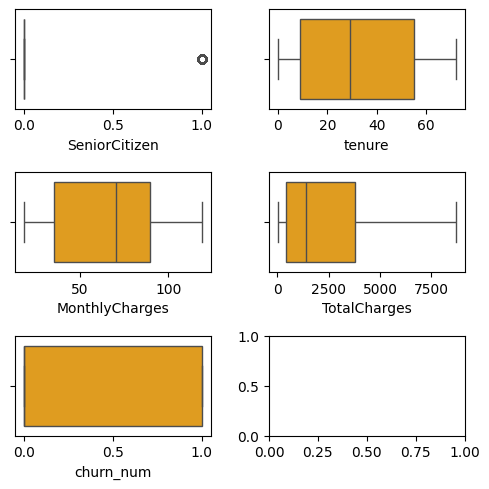

In [26]:
numerical_cols = numerical_df.columns.to_list()
numerical_cols
n_features  =len(numerical_cols)
num_cols = 2
num_rows = (n_features + 1)//num_cols

fig, axes = plt.subplots(ncols= num_cols, nrows = num_rows, figsize = (5,5))

position  = axes.flatten()

for index, name_of_feature in enumerate(numerical_cols):
    sns.boxplot(data = data[name_of_feature], ax = position[index], orient = "h", color = "orange")

plt.tight_layout()

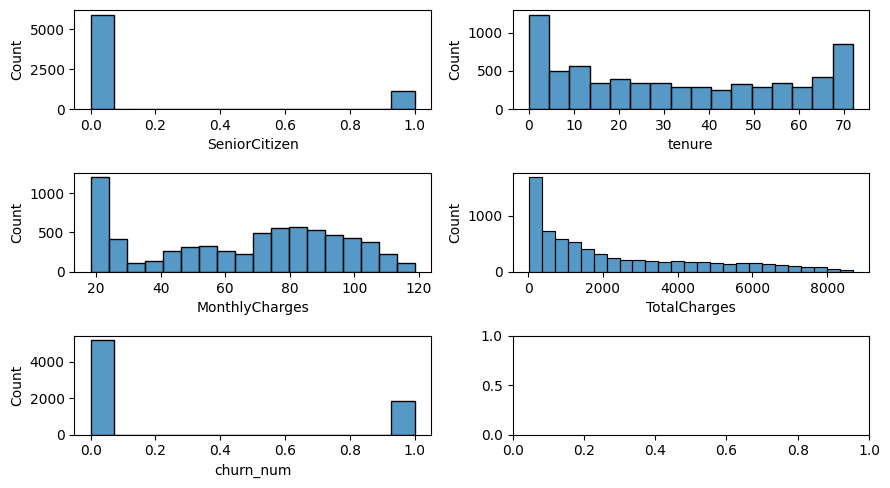

In [27]:
n_features  =len(numerical_cols)
num_cols = 2
num_rows = (n_features + 1)//num_cols

fig, axes = plt.subplots(ncols= num_cols, nrows = num_rows, figsize = (9,5))

position  = axes.flatten()

for index, name_of_feature in enumerate(numerical_cols):
    sns.histplot(data = data[name_of_feature], ax = position[index])

plt.tight_layout()

SeniorCitizen: Distribution is Bimodal/Binary.
 It shows that the majority of observations are for non-senior citizens (0), and a smaller proportion are senior citizens (1).

Tenure:Distribution is U-shaped or Bimodal.
The distribution appears to have two peaks, one at low values of tenure (indicating new customers) and another at higher values (indicating long-term customers). There is a dip in the middle, suggesting fewer customers with medium tenure.

MonthlyCharges: Distribution is Multimodal.
The distribution has several peaks, indicating that customers fall into different categories based on their monthly charges. suggesting different pricing tiers or service levels.

TotalCharges: Distribution is Right-Skewed/Positively Skewed.
The distribution has a long tail on the right side, indicating that most customers have lower total charges, with fewer customers having very high total charges.

**Grouping of customers by length of relationship (tenure)**

<Axes: xlabel='loyalty_group', ylabel='count'>

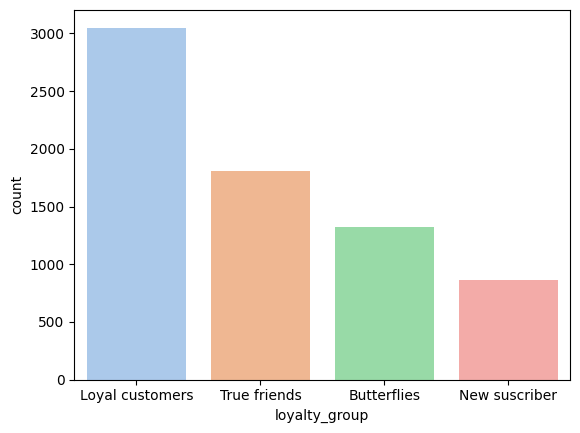

In [ ]:
def loyalty_group(tenure):
  if tenure<3:
    return "New suscriber"
  elif tenure<=12:
    return "Butterflies"
  elif tenure< 36:
    return "True friends"
  else:
    return "Loyal customers"
data['loyalty_group'] = data['tenure'].apply(loyalty_group)
#visualizing

sns.countplot(x="loyalty_group", data=data,
              order=data["loyalty_group"].value_counts(ascending=False).index,
              palette="pastel")



## **Bi vairate analysis**

<Axes: xlabel='churn_num', ylabel='count'>

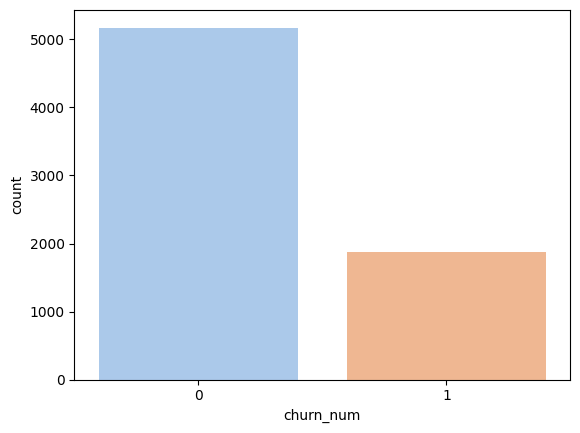

In [ ]:
def churn_num(Churn):
  if Churn=='No':
    return 0
  else:
    return 1
data['churn_num'] = data['Churn'].apply(churn_num)
#visualizing

sns.countplot(x="churn_num", data=data,
              order=data["churn_num"].value_counts(ascending=False).index,
              palette="pastel")

In [ ]:
numerical_df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,churn_num
SeniorCitizen,1.000000,0.016567,0.220173,0.102997,0.150889
tenure,0.016567,1.000000,0.247900,0.826164,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.651182,0.193356
TotalCharges,0.102997,0.826164,0.651182,1.000000,-0.198347
churn_num,0.150889,-0.352229,0.193356,-0.198347,1.000000


<Axes: >

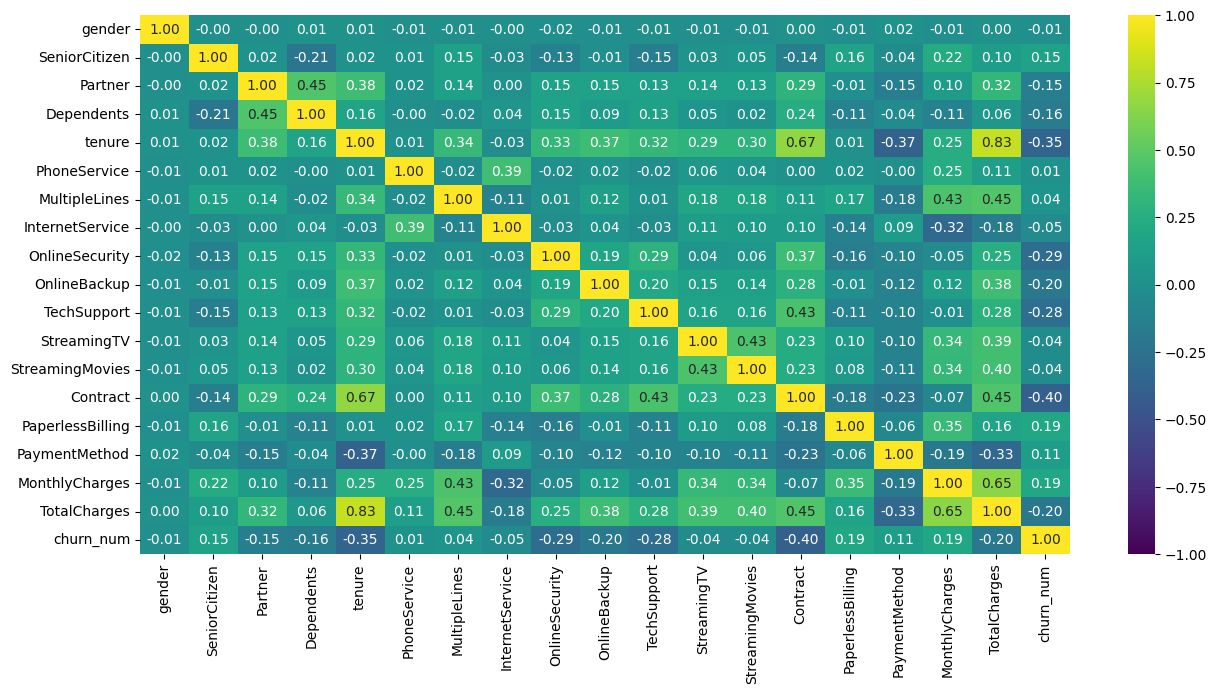

In [60]:
#my_mask = np.triu(np.ones_like(numerical_df.corr(), dtype = bool))

plt.figure(figsize = (15,7))
sns.heatmap(data = data2.corr(), cmap = "viridis", vmin = -1, vmax = 1, fmt = ".2f", annot = True )

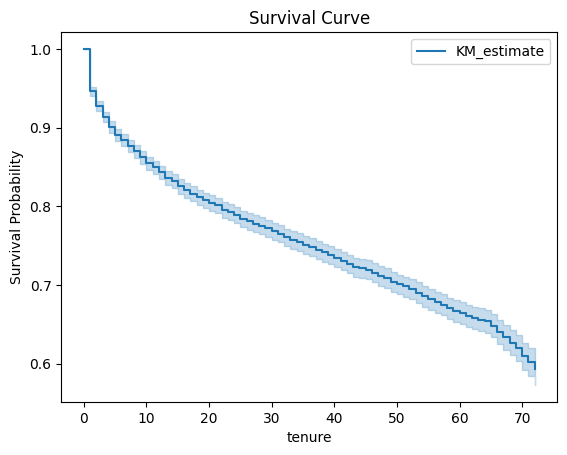

In [ ]:
# Create a Kaplan-Meier fitter instance
kmf = KaplanMeierFitter()

# Fit the data into the model
kmf.fit(durations=data['tenure'], event_observed=data['churn_num'])

# Plot the survival curve
kmf.plot_survival_function()
plt.title('Survival Curve')
plt.xlabel('tenure')
plt.ylabel('Survival Probability')
plt.show()

### **REGRESSION**

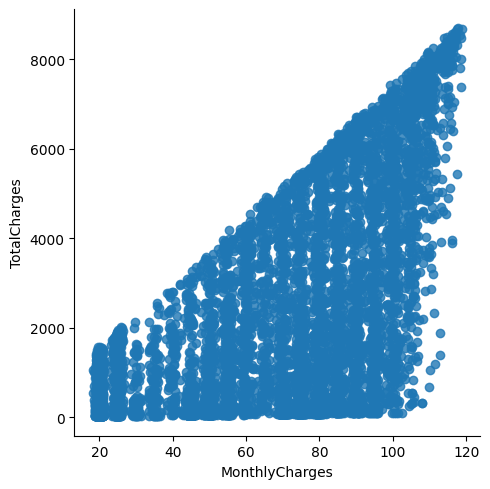

In [63]:
sns.lmplot(data=data2, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

This shows the positive correlation between monthly charges and the total charges

## **Categorical data analysis**

In [29]:
categorical_df = data.select_dtypes(include = "object")
categorical_df.head(2)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No


In [30]:
cat_columns = categorical_df.columns.to_list()
cat_columns
for feature in cat_columns:
    print(f"{feature} -----------> {data[feature].nunique()}")

gender -----------> 2
Partner -----------> 2
Dependents -----------> 2
PhoneService -----------> 2
MultipleLines -----------> 3
InternetService -----------> 3
OnlineSecurity -----------> 3
OnlineBackup -----------> 3
DeviceProtection -----------> 3
TechSupport -----------> 3
StreamingTV -----------> 3
StreamingMovies -----------> 3
Contract -----------> 3
PaperlessBilling -----------> 2
PaymentMethod -----------> 4
Churn -----------> 2


## **Univariate data analysis**

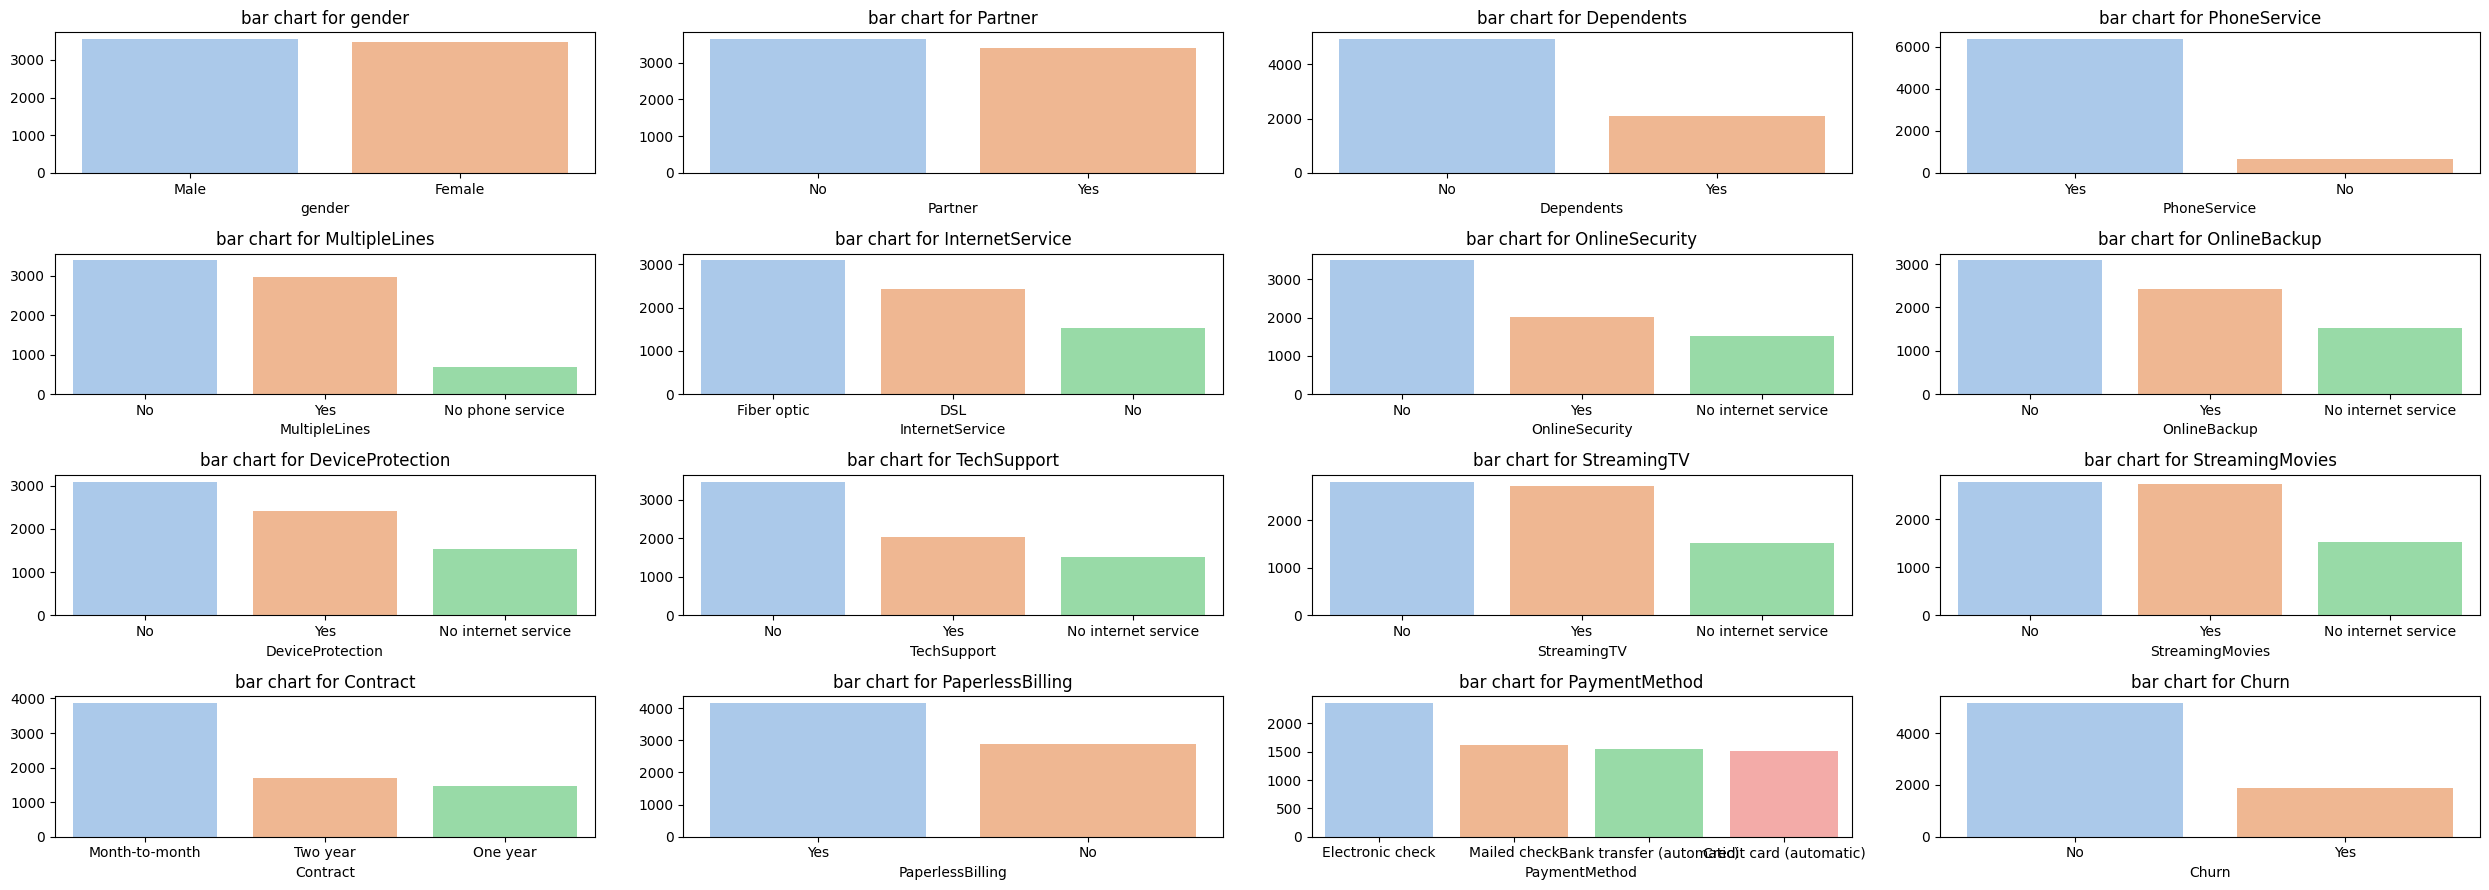

In [33]:
fig, axes = plt.subplots(nrows= 4, ncols= 4, figsize = (25,9))

position = axes.flatten()

for index, feature in enumerate(cat_columns):
    sns.barplot(x = data[feature].value_counts().index, y = data[feature].value_counts().values, ax = position[index],palette="pastel")
    position[index].set_title(f"bar chart for {feature}")

plt.tight_layout()

## BIVARIATE ANALYSIS

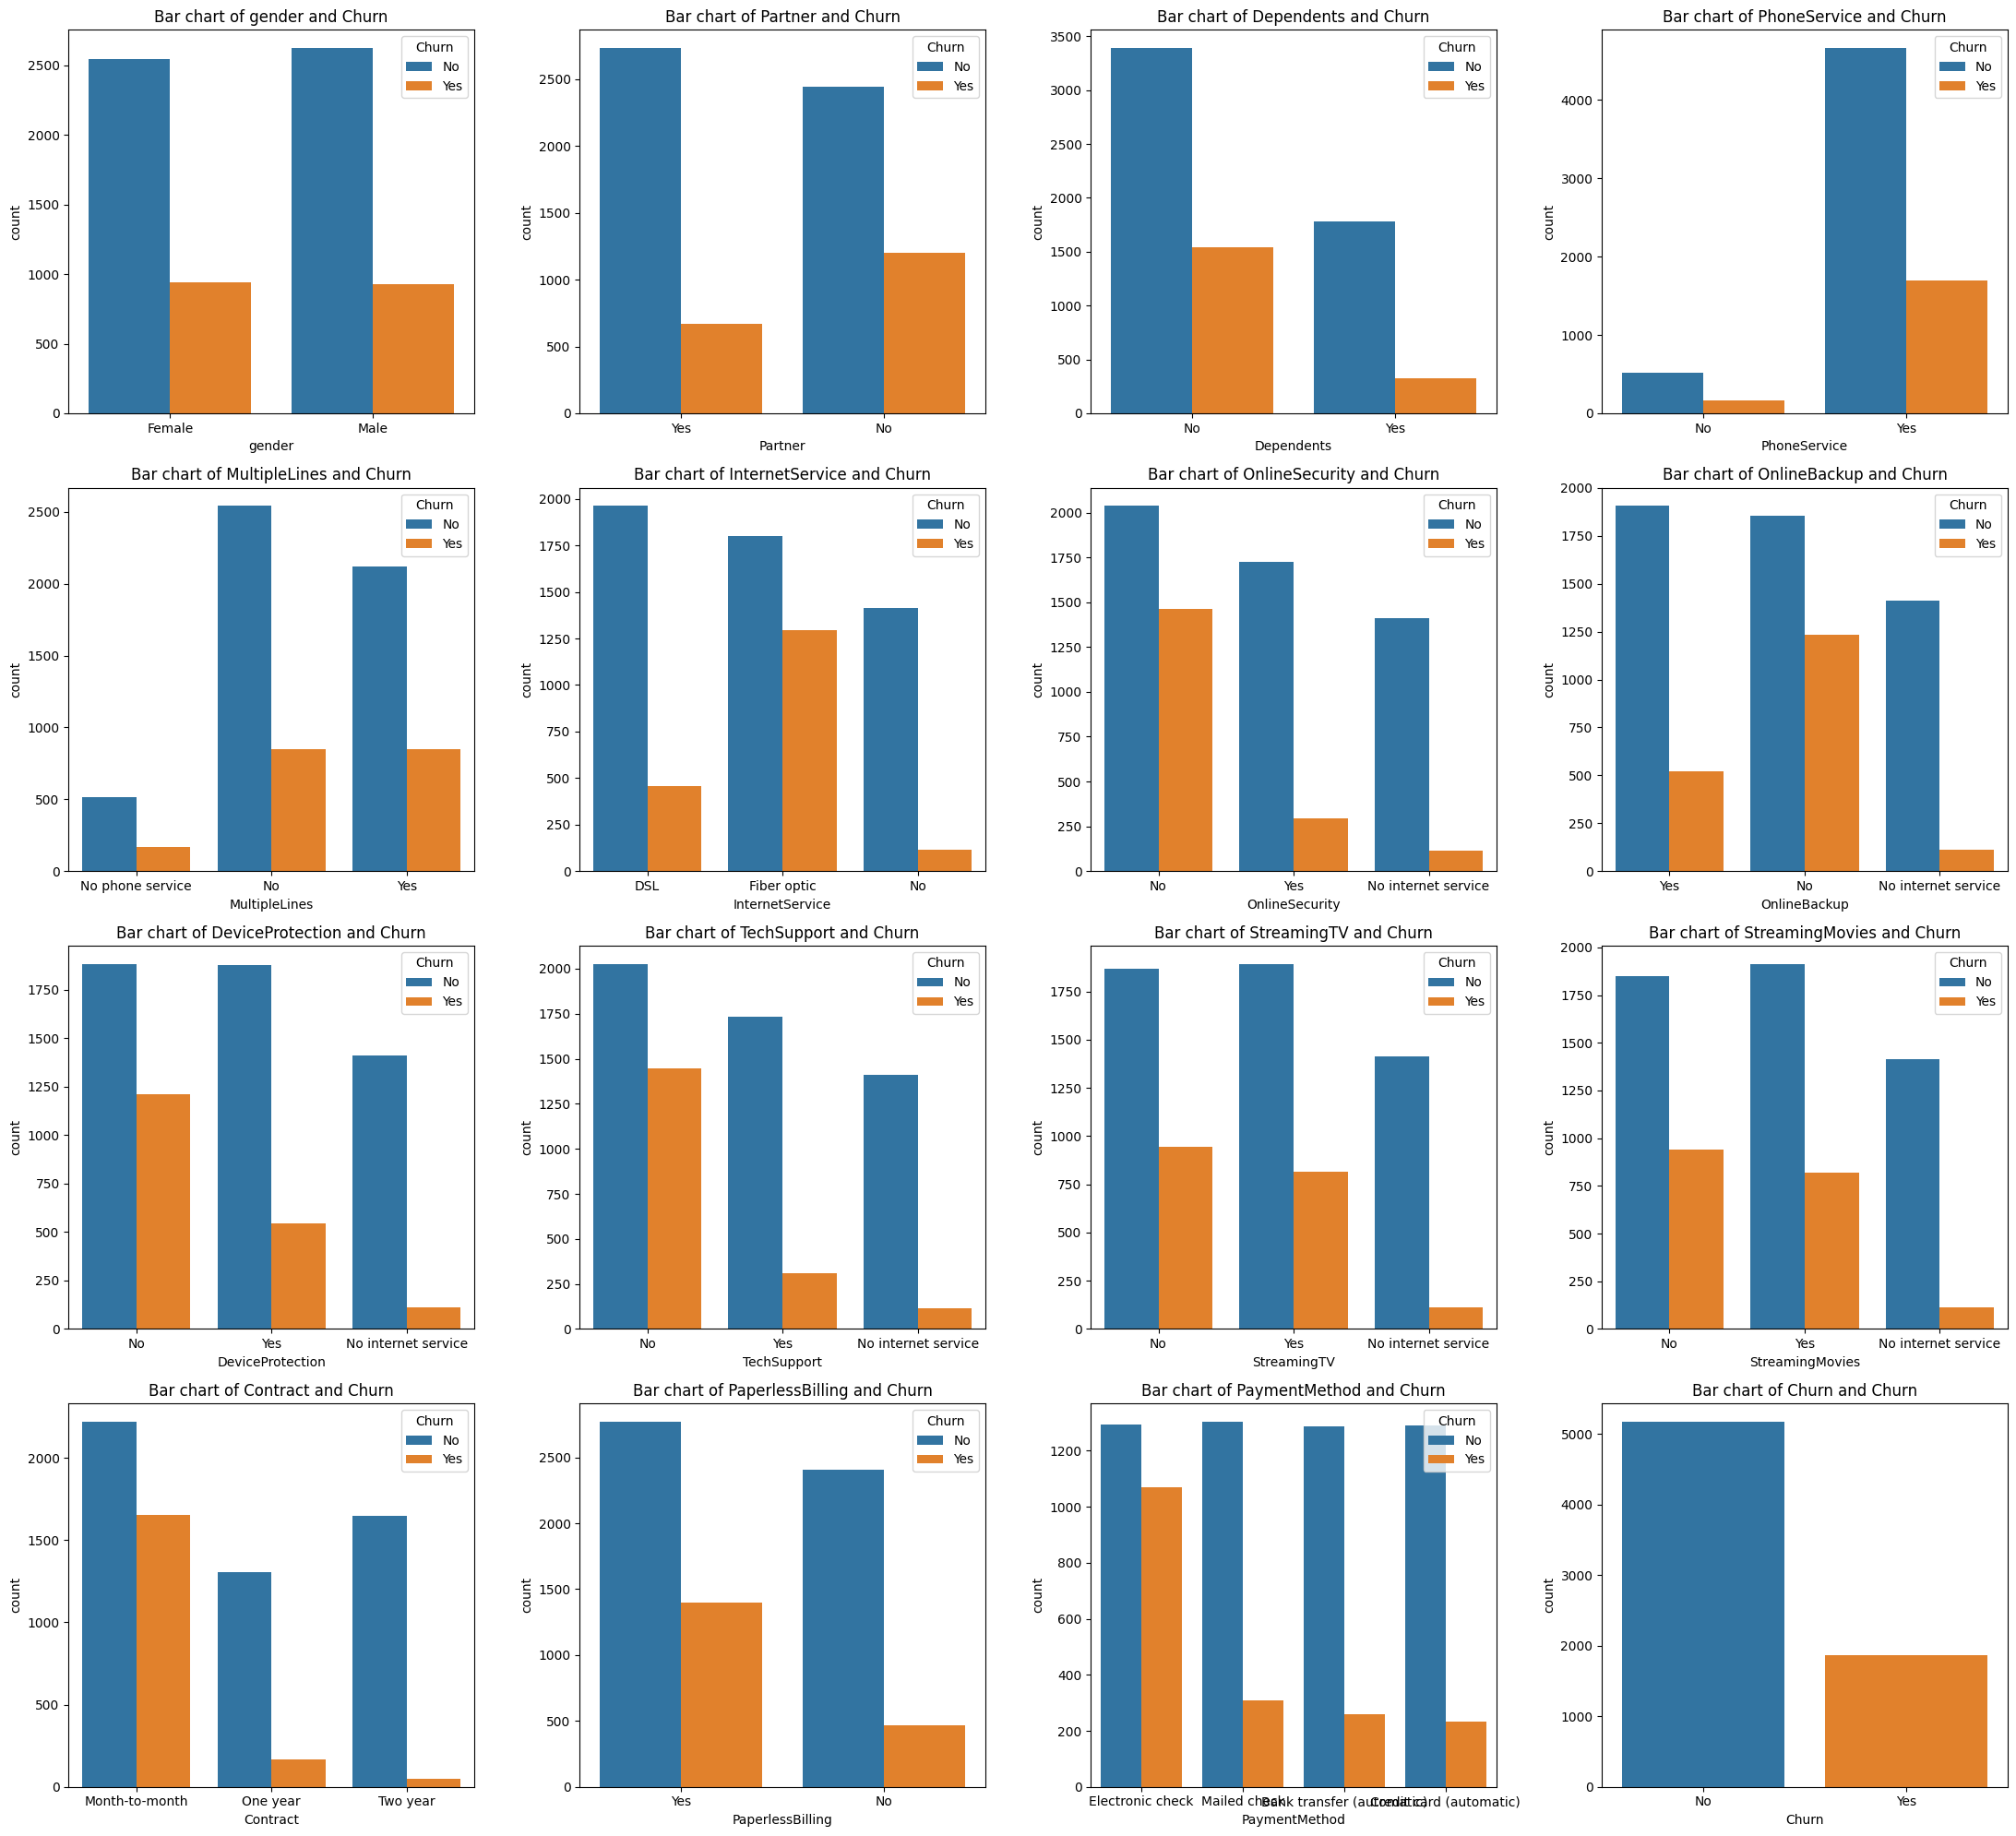

In [34]:
fig, axes = plt.subplots(nrows= 4, ncols= 4, figsize = (22,20))

position = axes.flatten()

for index, feature in enumerate(cat_columns):
    sns.countplot(data = categorical_df, x = feature, hue = data["Churn"], ax = position[index])
    position[index].set_title(f"Bar chart of {feature} and Churn")

plt.tight_layout()

### ***SERVICES PURCHASED***

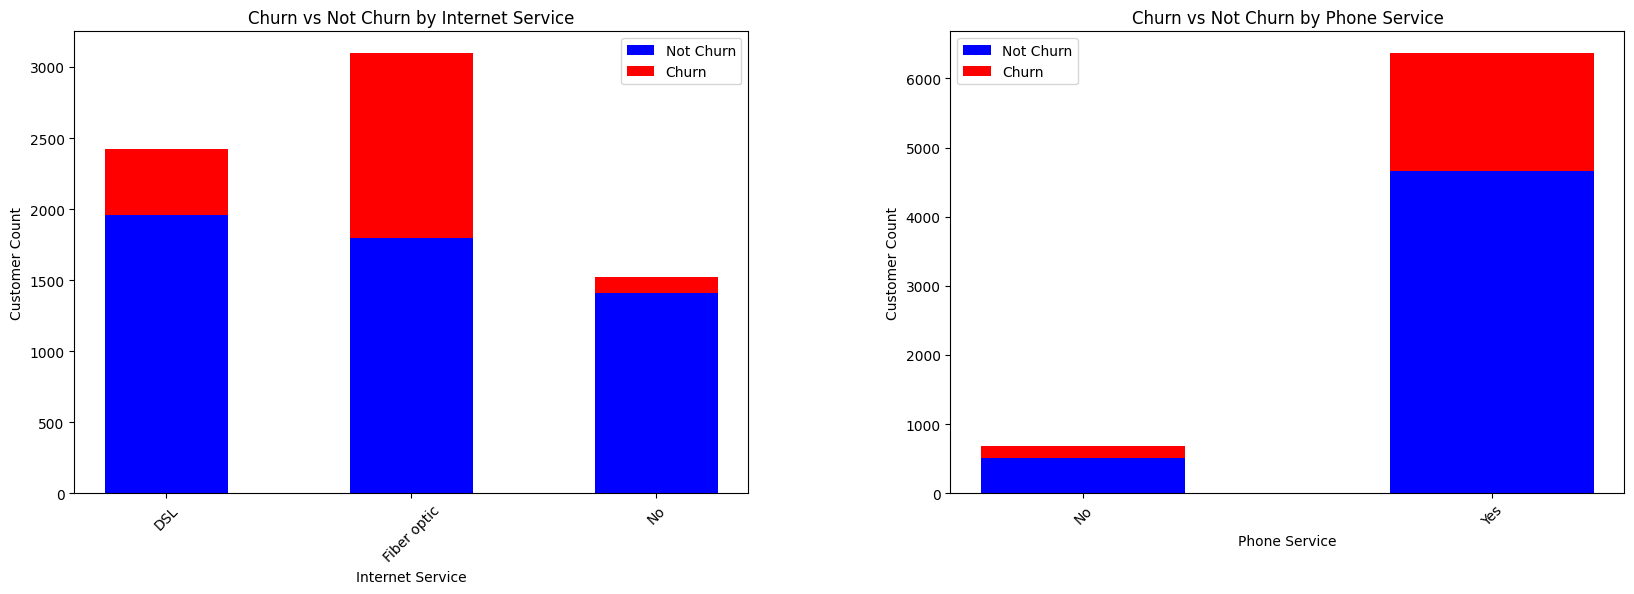

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
# Step 1: Group the data by InternetService and churn_num, then count occurrences
grouped_data = data.groupby(['InternetService', 'churn_num']).size().unstack(fill_value=0)

# Data for plotting
InternetService = grouped_data.index
churn = grouped_data[1]  # Assuming '1' indicates churn
not_churn = grouped_data[0]  # Assuming '0' indicates not churn
bar_width = 0.5
# Position of bars on the x-axis
indices = np.arange(len(InternetService))
# Adjust the subplots
plt.subplots_adjust(wspace=0.3)

# Subplot 1: Churn vs Not Churn by Internet Service
axes[0].bar(indices, not_churn, bar_width, label='Not Churn', color='b')
axes[0].bar(indices, churn, bar_width, bottom=not_churn, label='Churn', color='r')
axes[0].set_xlabel('Internet Service')
axes[0].set_ylabel('Customer Count')
axes[0].set_title('Churn vs Not Churn by Internet Service')
axes[0].set_xticks(indices)
axes[0].set_xticklabels(InternetService, rotation=45)
axes[0].legend()

#subplot 2:

grouped_data2 = data.groupby(['PhoneService', 'churn_num']).size().unstack(fill_value=0)

# Data for plotting
PhoneService = grouped_data2.index
churn = grouped_data2[1]  # Assuming '1' indicates churn
not_churn = grouped_data2[0]  # Assuming '0' indicates not churn

# Position of bars on the x-axis
indices = np.arange(len(PhoneService))
bar_width = 0.5
# Subplot 2: Churn vs Not Churn by Phone Service
axes[1].bar(indices, not_churn, bar_width, label='Not Churn', color='b')
axes[1].bar(indices, churn, bar_width, bottom=not_churn, label='Churn', color='r')
axes[1].set_xlabel('Phone Service')
axes[1].set_ylabel('Customer Count')
axes[1].set_title('Churn vs Not Churn by Phone Service')
axes[1].set_xticks(indices)
axes[1].set_xticklabels(PhoneService, rotation=45)
axes[1].legend()

# Display the charts
plt.show()



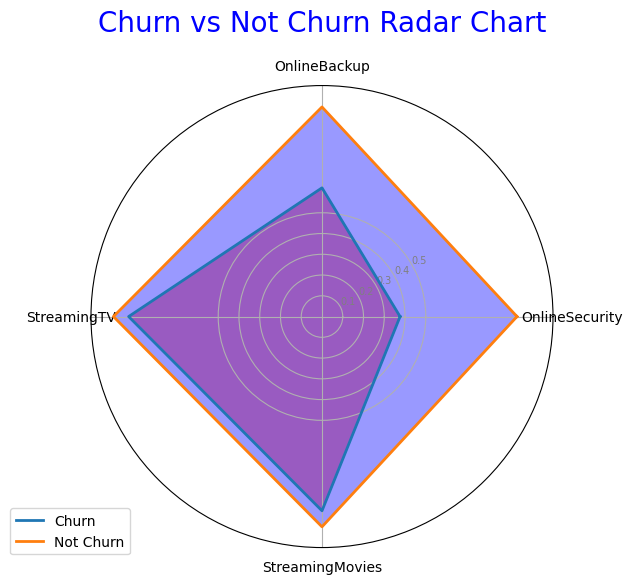

In [57]:
# Define the labels
labels = ['OnlineSecurity', 'OnlineBackup', 'StreamingTV', 'StreamingMovies']

# Calculate the mean for each feature by Churn group
churn_group = data2[data2['churn_num'] == 1][labels].mean()
not_churn_group = data2[data2['churn_num'] == 0][labels].mean()

# Convert the group values to a list and close the loop for the radar chart
values_churn = churn_group.tolist() + churn_group.tolist()[:1]
values_not_churn = not_churn_group.tolist() + not_churn_group.tolist()[:1]

# Calculate angle for each axis
num_vars = len(labels)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# Plotting
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], labels)

# Draw y-labels
ax.set_rlabel_position(30)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5], color="grey", size=7)
plt.ylim(0, max(max(values_churn), max(values_not_churn)) + 0.1)

# Plot data for Churn
ax.plot(angles, values_churn, linewidth=2, linestyle='solid', label='Churn')
ax.fill(angles, values_churn, color='r', alpha=0.4)

# Plot data for Not Churn
ax.plot(angles, values_not_churn, linewidth=2, linestyle='solid', label='Not Churn')
ax.fill(angles, values_not_churn, color='b', alpha=0.4)

# Add a title and legend
plt.title('Churn vs Not Churn Radar Chart', size=20, color='b', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the chart
plt.show()

Text(0.5, 1.0, 'Monthly charges by churn')

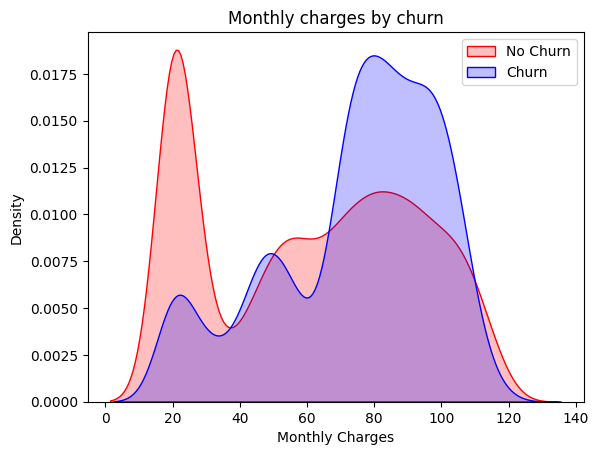

In [61]:
#Measure the churn by charges

Mth = sns.kdeplot(data2.MonthlyCharges[(data2["churn_num"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(data2.MonthlyCharges[(data2["churn_num"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Insight: the high churn is attributed to high monthly charges.

Text(0.5, 1.0, 'Total charges by churn')

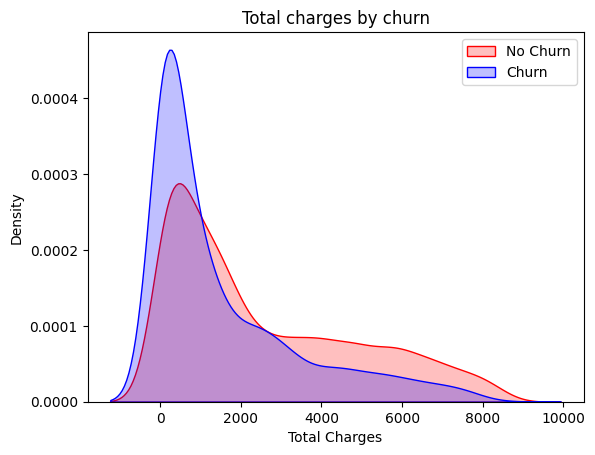

In [62]:
Tot = sns.kdeplot(data2.TotalCharges[(data2["churn_num"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(data2.TotalCharges[(data2["churn_num"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

The twist is that  more churn is experienced with lower charges.

Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors; Higher Monthly Charge, Lower tenure, and Lower Total Charge are linked to High Churn.

## **Multivariate analysis**

In [ ]:
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn_num,loyalty_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,New suscriber
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,0,True friends


In [ ]:


table = pd.pivot_table(data=data,index=['Churn','TechSupport'],
                    values = 'TotalCharges',aggfunc = np.mean)
table

TotalCharges
Churn TechSupport                      
No    No                    2581.345856
      No internet service    701.778379
      Yes                   4019.432814
Yes   No                    1399.570781
      No internet service    173.919912
      Yes                   2643.530968

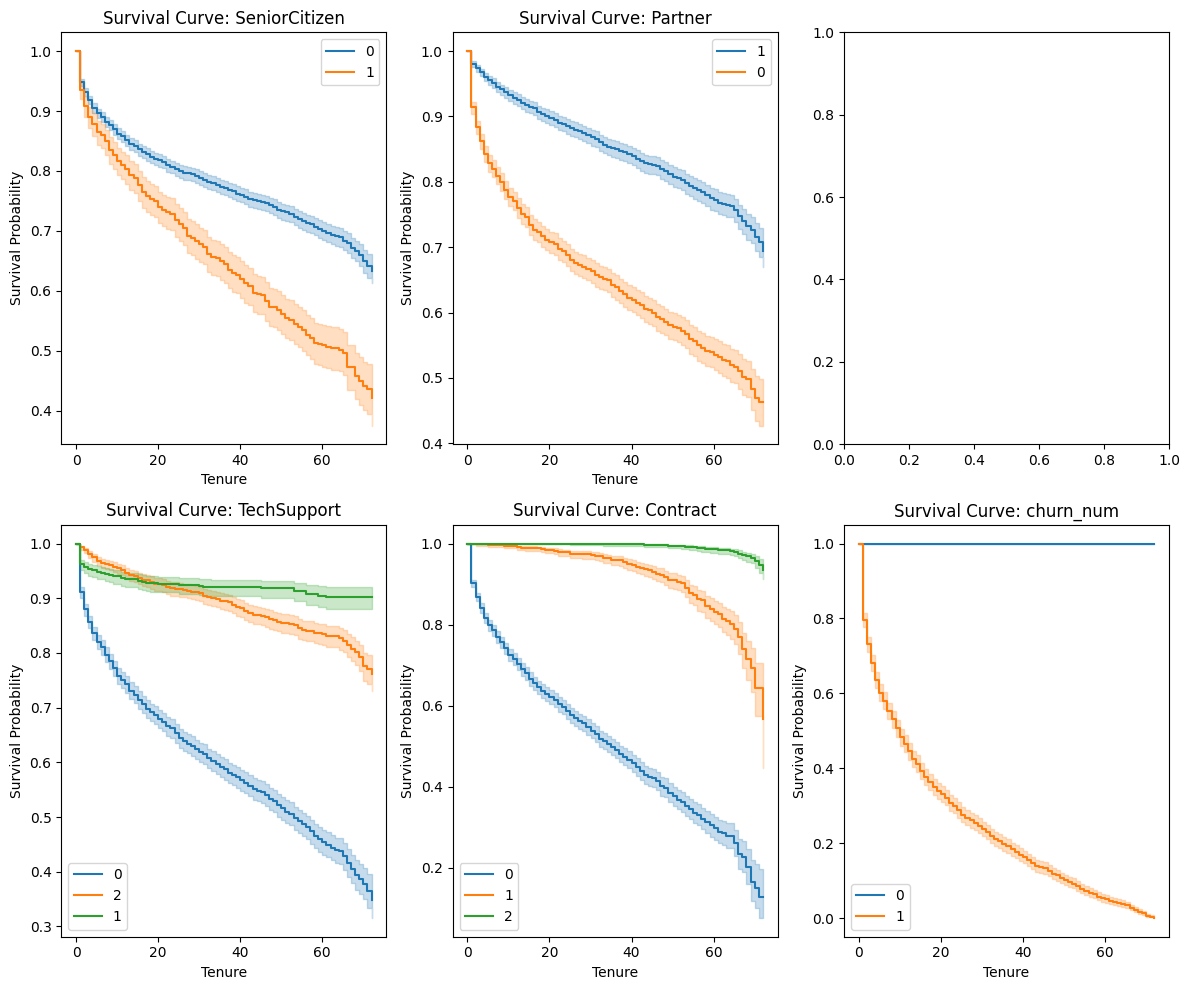

In [48]:
data2 = pd.concat([features, label], axis=1)
data3 = data2[["SeniorCitizen", "Partner", "tenure", "TechSupport", "Contract", "churn_num"]]
n_cols = data3.columns.to_list()
n_features1 = len(n_cols)
num_cols = 3
num_rows = (n_features1 + 1) // num_cols

fig, axes = plt.subplots(ncols=num_cols, nrows=num_rows, figsize=(12, 10))
position = axes.flatten()

# Create a Kaplan-Meier fitter instance
kmf = KaplanMeierFitter()

for index, name_of_feature in enumerate(data3.columns):
    if name_of_feature != 'tenure':  # 'tenure' is the duration, not an event
        ax = position[index]
        for category in data3[name_of_feature].unique():  # Stratify by the unique values (e.g., 0 and 1)
            mask = data3[name_of_feature] == category
            kmf.fit(durations=data3['tenure'][mask], event_observed=data3['churn_num'][mask], label=str(category))
            kmf.plot_survival_function(ax=ax)

        ax.set_title(f'Survival Curve: {name_of_feature}')
        ax.set_xlabel('Tenure')
        ax.set_ylabel('Survival Probability')

plt.tight_layout()
plt.show()

In [52]:
data2.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn_num
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,0,0,0,1,0,3,56.95,1889.50,0


## **Modelling (Churn Prediction)**

### **Data pre-processing**

In [ ]:
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,loyalty_group,churn_num
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,New suscriber,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,True friends,0


In [45]:
features = data[["gender","SeniorCitizen","Partner","Dependents","tenure","PhoneService", "MultipleLines","InternetService","OnlineSecurity","OnlineBackup","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod","MonthlyCharges","TotalCharges"]]
label= data[['churn_num']]

### Encoding our categorical variables

In [46]:
# Select all our categorical data
all_categorical_columns = features.select_dtypes(include = "object")
all_categorical_columns.head(2)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,No,No,No,One year,No,Mailed check


In [47]:
#initializing
encoder = LabelEncoder()
#enconding
for column_name in all_categorical_columns:
    features[column_name] = encoder.fit_transform(all_categorical_columns[column_name])
features.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,1,2,70.70,151.65


## **Machine learning**

**Data splitting**

In [ ]:
print(f"Our data contains {len(features)} before splitting")
train_data, test_data = train_test_split(features, test_size=0.2, random_state=42)
Xtrain, Xtest, ytrain, ytest = train_test_split(features, label, test_size=0.2, random_state=42)

Our data contains 7043 before splitting


In [ ]:
print(f"Features shape: {features.shape}")
print(f"Label shape: {label.shape}")


Features shape: (7043, 18)
Label shape: (7043, 1)


## **Model Training**

In [ ]:
# #Logistic regression
#Initialize/ build the model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(Xtrain, ytrain)

LogisticRegression(random_state=42)

In [ ]:

# Initialize and train the models
weights = {0:1, 1:4}
classifiers = [[LogisticRegression(random_state=42, class_weight=weights), 'Logistic Regression'],
               [SGDClassifier(random_state=42, class_weight=weights), 'SGD Classifiers'],
               [DecisionTreeClassifier(random_state=42, class_weight=weights), 'Decision Tree'],
               [RandomForestClassifier(random_state=42, class_weight=weights), 'Random Forest'],
              ]

In [ ]:
Xtrain.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,0,0,0,1,21,1,0,0,2,0,0,0,2,1,0,3,64.85,1336.80
1623,0,0,0,0,54,1,2,1,0,2,0,2,2,2,1,0,97.20,5129.45


<--- Logistic Regression --->
              precision  recall  f1-score  support
0                 94.60   64.29     76.55  1036.00
1                 47.52   89.81     62.15   373.00
accuracy          71.04   71.04     71.04     0.71
macro avg         71.06   77.05     69.35  1409.00
weighted avg      82.14   71.04     72.74  1409.00


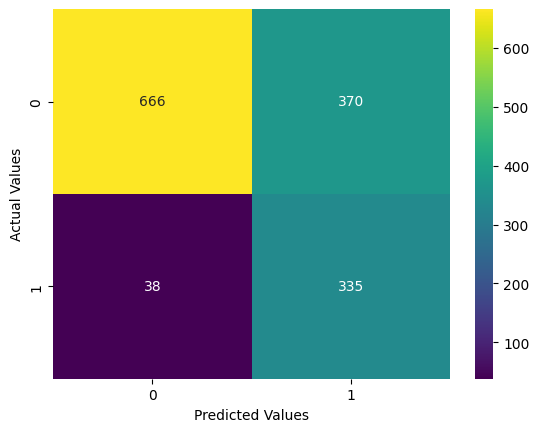

<--- SGD Classifiers --->
              precision  recall  f1-score  support
0                 98.05   24.32     38.98  1036.00
1                 31.94   98.66     48.26   373.00
accuracy          44.00   44.00     44.00     0.44
macro avg         65.00   61.49     43.62  1409.00
weighted avg      80.55   44.00     41.44  1409.00


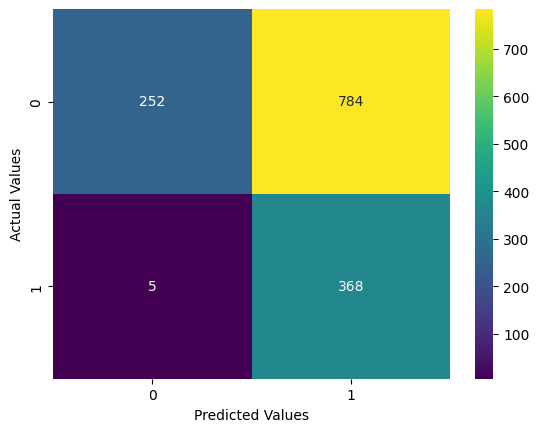

<--- Decision Tree --->
              precision  recall  f1-score  support
0                 80.99   80.60     80.79  1036.00
1                 46.83   47.45     47.14   373.00
accuracy          71.82   71.82     71.82     0.72
macro avg         63.91   64.03     63.97  1409.00
weighted avg      71.95   71.82     71.88  1409.00


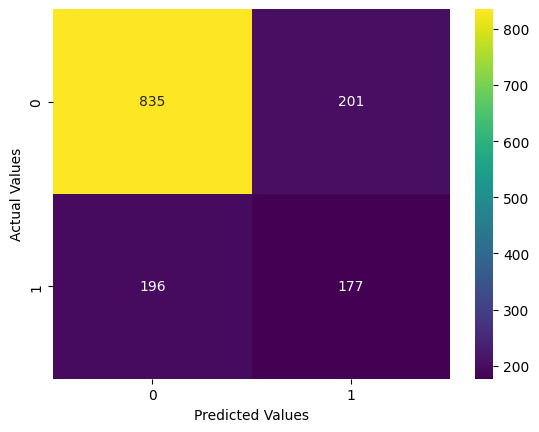

<--- Random Forest --->
              precision  recall  f1-score  support
0                 82.20   91.41     86.56  1036.00
1                 65.37   45.04     53.33   373.00
accuracy          79.13   79.13     79.13     0.79
macro avg         73.79   68.22     69.95  1409.00
weighted avg      77.75   79.13     77.77  1409.00


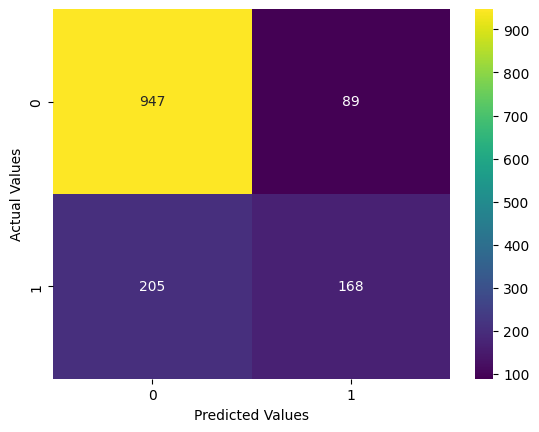

In [ ]:
for classifier in classifiers:
    model = classifier[0]
    model_name = classifier[1]
    print(f"<--- {model_name} --->")

    # Fit the model and make predictions
    model.fit(Xtrain, ytrain)
    predictions = model.predict(Xtest)

    # Generate classification report and confusion matrix
    report = classification_report(ytest, predictions, digits=3, output_dict=True)
    matrix = confusion_matrix(ytest, predictions)

    # Convert report to DataFrame for better formatting
    report_df = pd.DataFrame(report).transpose()

    # Convert metrics to percentages
    report_df[['precision', 'recall', 'f1-score']] = report_df[['precision', 'recall', 'f1-score']] * 100

    # Display the classification report as a table
    print(report_df.round(2))

    # Plot confusion matrix
    sns.heatmap(matrix, annot=True, fmt='g', cmap='viridis')
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values")
    plt.show()

In [ ]:
#Model performance poorly. optimize performance by standardizing the data
scaler = StandardScaler()
# Fit the scaler on the training data and transform it
Xtrain_scaled = scaler.fit_transform(Xtrain)

# Transform the test data using the fitted scaler
Xtest_scaled = scaler.transform(Xtest)

<--- Logistic Regression --->
              precision  recall  f1-score  support
0                 95.07   63.22     75.94  1036.00
1                 47.08   90.88     62.03   373.00
accuracy          70.55   70.55     70.55     0.71
macro avg         71.07   77.05     68.99  1409.00
weighted avg      82.36   70.55     72.26  1409.00


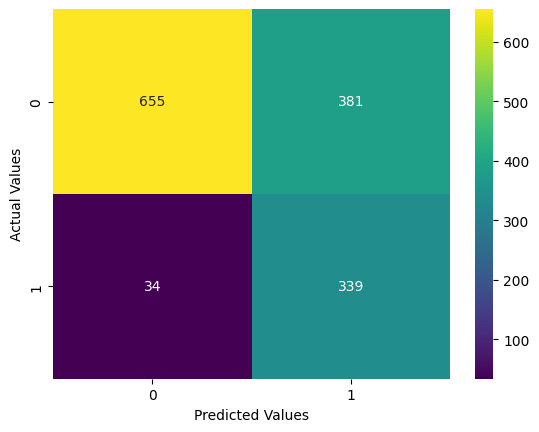

<--- SGD Classifiers --->
              precision  recall  f1-score  support
0                 91.18   70.85     79.74  1036.00
1                 50.00   80.97     61.82   373.00
accuracy          73.53   73.53     73.53     0.74
macro avg         70.59   75.91     70.78  1409.00
weighted avg      80.28   73.53     75.00  1409.00


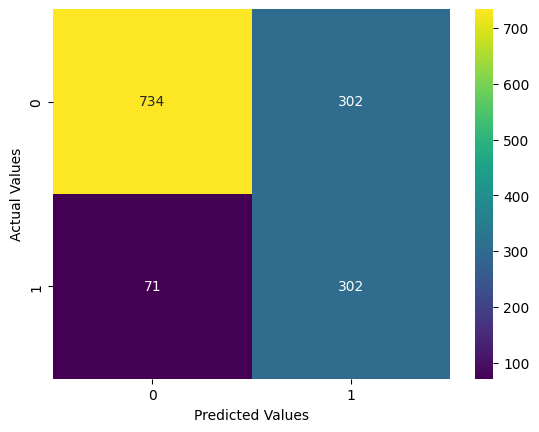

<--- Decision Tree --->
              precision  recall  f1-score  support
0                 81.05   80.50     80.77  1036.00
1                 46.84   47.72     47.28   373.00
accuracy          71.82   71.82     71.82     0.72
macro avg         63.95   64.11     64.03  1409.00
weighted avg      71.99   71.82     71.91  1409.00


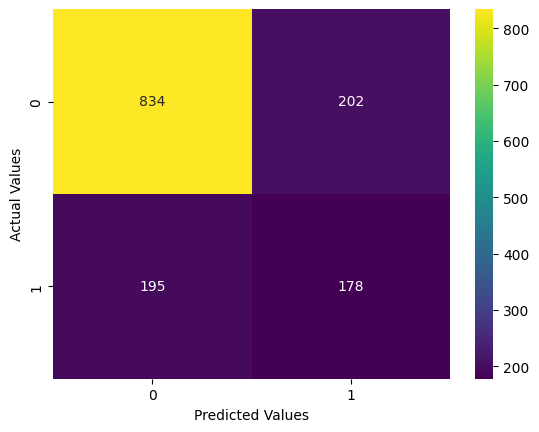

<--- Random Forest --->
              precision  recall  f1-score  support
0                 82.15   91.51     86.58  1036.00
1                 65.49   44.77     53.18   373.00
accuracy          79.13   79.13     79.13     0.79
macro avg         73.82   68.14     69.88  1409.00
weighted avg      77.74   79.13     77.74  1409.00


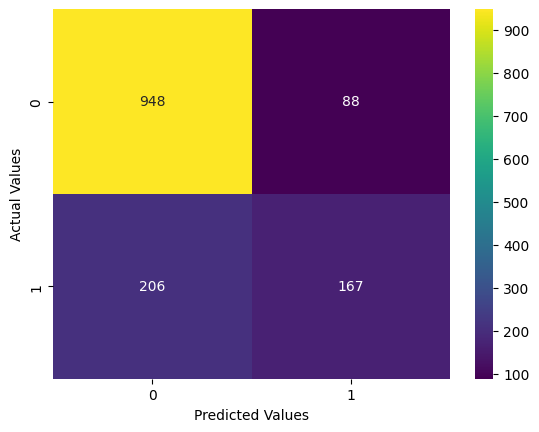

In [ ]:
#RE-EVALUATE MODEL PERFORMANCE ON SCALED DATA
for classifier in classifiers:
    model = classifier[0]
    model_name = classifier[1]
    print(f"<--- {model_name} --->")

    # Fit the model and make predictions
    model.fit(Xtrain_scaled, ytrain)
    predictions = model.predict(Xtest_scaled)

    # Generate classification report and confusion matrix
    report = classification_report(ytest, predictions, digits=3, output_dict=True)
    matrix = confusion_matrix(ytest, predictions)

    # Convert report to DataFrame for better formatting
    report_df = pd.DataFrame(report).transpose()

    # Convert metrics to percentages
    report_df[['precision', 'recall', 'f1-score']] = report_df[['precision', 'recall', 'f1-score']] * 100

    # Display the classification report as a table
    print(report_df.round(2))

    # Plot confusion matrix
    sns.heatmap(matrix, annot=True, fmt='g', cmap='viridis')
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values")
    plt.show()

### **Automating hyper para grid search**

Best parameters: {'C': 40, 'class_weight': {0: 1, 1: 4}}
Best recall score: 0.8676454849498327
              precision  recall  f1-score  support
0                 82.15   91.51     86.58  1036.00
1                 65.49   44.77     53.18   373.00
accuracy          79.13   79.13     79.13     0.79
macro avg         73.82   68.14     69.88  1409.00
weighted avg      77.74   79.13     77.74  1409.00


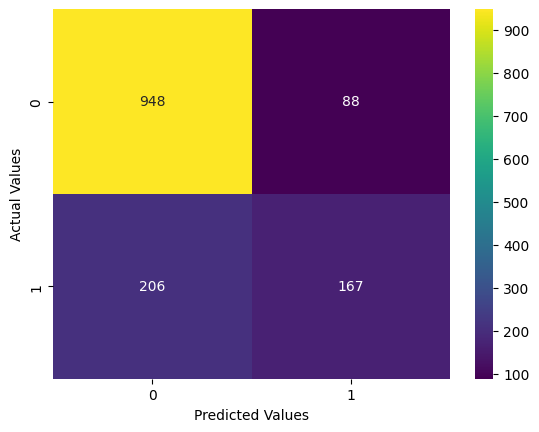

In [ ]:
# Define the parameter grid for logistic regression
D_param_grid = {
    'C': [0.1, 1, 40],  # Regularization strength (inverse of regularization parameter)
    'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}],  # Handling class imbalance
    }

# classifiers[0][0] is a LogisticRegression model
grid_search = GridSearchCV(estimator=classifiers[0][0],
                           param_grid=D_param_grid,
                           cv=5,
                           scoring='recall')

# Fit the GridSearchCV to the data (Xtrain_scaled, ytrain)
grid_search.fit(Xtrain_scaled, ytrain)

# Get the best parameters and best recall score
best_params = grid_search.best_params_
best_recall = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best recall score: {best_recall}")

best_model= grid_search.best_estimator_
prediction= best_model.predict(Xtrain_scaled)
# Generate classification report and confusion matrix
report = classification_report(ytest, predictions, digits=3, output_dict=True)
matrix = confusion_matrix(ytest, predictions)

    # Convert report to DataFrame for better formatting
report_df = pd.DataFrame(report).transpose()

# Convert metrics to percentages
report_df[['precision', 'recall', 'f1-score']] = report_df[['precision', 'recall', 'f1-score']] * 100

# Display the classification report as a table
print(report_df.round(2))

# Plot confusion matrix
sns.heatmap(matrix, annot=True, fmt='g', cmap='viridis')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

## **Feature Importance**

In [ ]:
classifiers[0][0]

LogisticRegression(class_weight={0: 1, 1: 4}, random_state=42)

In [ ]:
#Feature importance on my logical regression model
importance = classifiers[0][0].coef_[0]
importance = np.abs(importance)

feature_names = Xtrain.columns
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
feature_importance_df

,Feature,Importance
4,tenure,1.157768
13,Contract,0.671810
16,MonthlyCharges,0.666785
17,TotalCharges,0.522874
5,PhoneService,0.281114
8,OnlineSecurity,0.243543
10,TechSupport,0.211035
14,PaperlessBilling,0.167980
7,InternetService,0.136886
9,OnlineBackup,0.132876


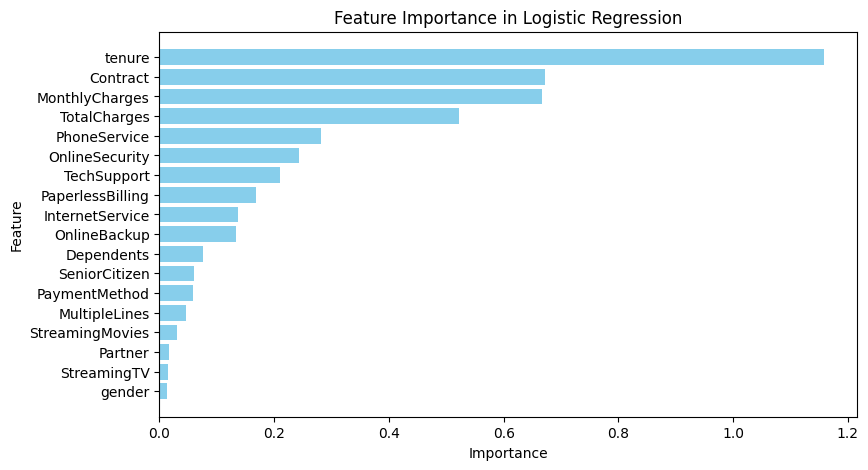

In [ ]:
# Plotting the feature importances
plt.figure(figsize=(9, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression')
plt.gca().invert_yaxis()
plt.show()





ROC AUC Score: 0.8612354694794372


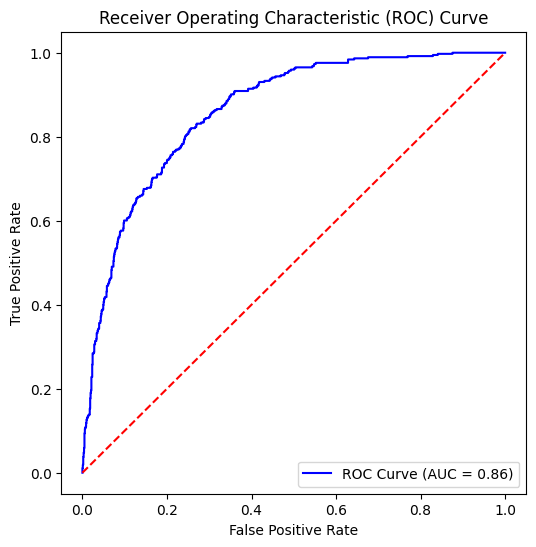

In [ ]:
# Predict the probabilities for the positive class
y_prob = classifiers[0][0].predict_proba(Xtest_scaled)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(ytest, y_prob)
print(f'ROC AUC Score: {roc_auc}')

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(ytest, y_prob)

# Plotting the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

This ROC curve suggests that the model is a good fit for the classification task, and its predictions are generally reliable, with a strong balance between sensitivity and specificity.